# Deliberation

In [24]:
import numpy as np
import random
import math
from scipy.stats import beta
import networkx as nx
import pandas as pd

from mesa import Model, Agent
from mesa.space import NetworkGrid
from mesa.time import RandomActivation

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import mpmath 
from mpmath import mp
mp.prec = 100
sns.set()
from tqdm.notebook import tqdm
from itertools import starmap
from multiprocess import Pool, cpu_count

matplotlib.rcParams['figure.figsize'] = (9, 6)


There are three types of criteria to evaluate a proposed decision-making procedure: 

1. Practical reasons: The procedure should be easy to implement for groups of a given size, and following the procedure should not take too much time to arrive at a decision. 
2. Procedural reasons: The procedure should  should be fair and it should end up in a consensus that all group members endorse. 
3. Epistemic reasons: The group decision should be reliable and it should coincide with the fact of the matter if it is the task of the group to decide on a fact of the matter (e.g. the group decision should be ‘guilty if and only if the defendant is guilty).


S. Hartmann and S. Rafiee Rad (2018). [Voting, deliberation and truth](https://link.springer.com/content/pdf/10.1007%2Fs11229-016-1268-9.pdf), Synthese, 105, pp. 1273 - 1293. 

A formal analysis which (i) shows that deliberation procedures are truth-conducive (in a similar way as majority voting is truth conducive according to the Condorcet Jury Theorem) and that (ii) explores which procedure does better (under certain conditions) epistemically.




Fix a binary propositional variable with values $H$: the hypothesis is true, and $\neg H$: the hypothesis is false.  Assume that $H$ is true. 

Consider  a group of $n$ agents who deliberate on the truth or falsity of $H$. 

The group members express their individual verdicts in terms of a yes/no vote. The votes are represented by binary propositional variables $V_i$ (for $i = 1,\ldots, n$) with the values: $V_i$: agent $i$ votes "yes", i.e., that $H$ is true $\neg V_i$: agent $i$ votes "no", i.e., that $H$ is false. thesis is false.


1. During the procedure, no new evidence comes up. However, some people forgot or did not notice certain pieces of evidence. There is also disagreement about the strength of certain pieces of evidence. Initially, the jury members do not know each other at all (they were randomly assembled). They therefore do not know how much weight they can assign to the verdicts of their colleagues. However, during the course of deliberation they get to know each other much better. They see how the others argue, how they criticize the arguments of others, and what they remember of the details of the case. This helps them to better assess how reliable the other group members are and which weight to assign to their verdicts.

2. Assume that it is in the interest of each group member that the probability that the ﬁnal verdict of the group corresponds to the truth is as large as possible.

3. Each group member $i$ has a first-order reliability $r_i$: the probability that $i$ will make the correct judgements. 

4. The other group members do not know the reliability of the other agents. At stage $t$, 
$$r_{ij}^ = Pr^t_i(V_j\mid H) = Pr^t_i(\neg V_j\mid \neg H)$$
is $i$'s estimation of $j$'s first-order reliability. 

4. The agents  become better and better in assessing the reliability of the other group members.  For each group member $i$, let $c_i$ be the second-order reliability of $i$ to judge the first-order reliability of the other group members.  So, if $c_i = 1$, then $i$ assigns correct first-order reliability to every group member $j$; and if $c_i = 0$, then $i$ assigns a random first-order reliability to the other agents drawn uniformaly from $(0,1)$.  





ng empirically but it can be relaxed easily). If c i = 0, then group member a i assigns a random reliability from the interval (0, 1) to group member a i . If c i ∈ (0, 1), then we follow the procedure speciﬁed below which basically assigns

123 1278

Synthese (2018) 195:1273–1293

a reliability drawn from a more or less broad distribution around r i (depending on the value of the second order reliability). This reliability weights the verdict of group member a j in each voting round.

The group members are therefore characterized by two parameters. The ﬁrst order reliability r i to make the right decision, and the second order reliability c i to assess the ﬁrst order reliability of the other group members.


We assume that the ﬁrst order reliability is kept ﬁxed during the course of deliberation. It characterizes, in general terms, how good a certain group member is in making the right judgement. In the course of the deliberation, the quality of the judgement of the group member only goes up because she learns to better weigh the judgements of the other group members. That is, we assume that the second order reliabilities increase in the course of the deliberation because they learn to better judge the reliabilities of the other group members as the deliberation process reveals new information about their reliability (but not about the fact under consideration).

The deliberation procedure we propose then works as follows. The group has to decide on the truth or falsity of a hypothesis H. Each group member assigns a certain probability to H. Then each group member casts a vote on the basis of this probability. Then each group member updates her probability on the basis of the votes of the other group members, weighted according to the estimated reliabilities as explained above. The procedure is iterated, and in each round the second order reliabilities are increased which leads to a more accurate estimation of the reliability of the votes of the other group members. After a number of rounds, this process converges.

One disclaimer before we continue: we call the process we model here a deliberation as it (i) involves the change of belief of the group members in every round and as it (ii) leads to a consensus (as we will see).

In [5]:
def find_beta(r, c):
    return 2, (min(1, r - c + 1) - max(0, r + c - 1)) / (r - max(0, r + c - 1))

def linear_transform(x, r, c): 
    max_x = min(1, r - c + 1)
    min_x = max(0, r + c - 1)
    return (max_x - min_x)* x + min_x

xs = np.linspace(0,1,100)

def estimate_reliability(rel, second_order_rel): 
    
    if second_order_rel == 0: 
        return np.random.uniform(0,1)
    elif second_order_rel == 1:
        return rel
    else: 
        return linear_transform(np.random.beta(*find_beta(rel, second_order_rel)), rel, second_order_rel)

def estimate_reliability2(rel, second_order_rel): 
    
    return np.random.uniform(max(0, rel + second_order_rel -1), min(1, rel - second_order_rel + 1))


cs = [_c / 20 for _c in range(0,21)] 

print(cs)
rel = 0.75
second_order_rel = 0.6

print(estimate_reliability2(rel, second_order_rel))

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
0.885796346790901


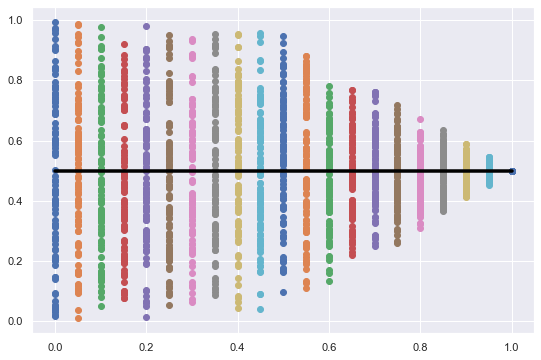

In [6]:
xs = np.linspace(0,1,1000)

rel = 0.5

for c in cs: 
    est_rels = [estimate_reliability(rel, c) for _ in range(100)]

    plt.scatter([c]*100, est_rels)
plt.plot([0,1.0],[rel, rel],  '-', color="black",lw = 3.5)

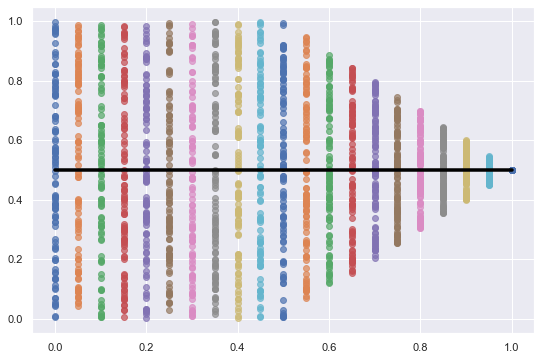

In [7]:
xs = np.linspace(0,1,1000)

rel = 0.5

for c in cs: 
    est_rels = [estimate_reliability2(rel, c) for _ in range(100)]

    plt.scatter([c]*100, est_rels, alpha=0.7)
    
plt.plot([0,1.0],[rel, rel],  '-', color="black",lw = 3.5)

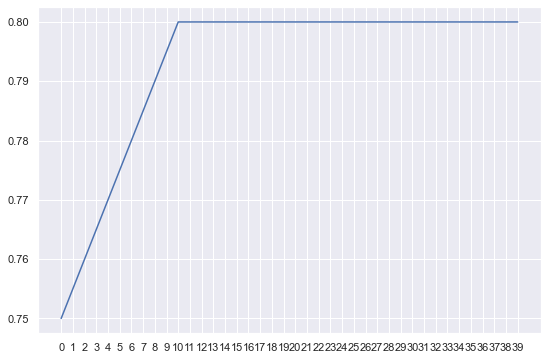

In [8]:
def updated_second_order_reliability(int_rel2, round_num, max_rel2, max_num_rounds):
    
    return (((max_rel2 - int_rel2) * round_num / max_num_rounds) + int_rel2) if round_num <= max_num_rounds else max_rel2
    
num_rounds = 40

max_num_rounds = 10
init_rel2 = 0.75
max_rel2 = 0.8

plt.plot([str(r) for r in range(num_rounds)], 
         [updated_second_order_reliability(init_rel2, r, max_rel2, max_num_rounds) for r in range(num_rounds)])


In [22]:
def find_beta(r, c):
    return 2, (min(1, r - c + 1) - max(0, r + c - 1)) / (r - max(0, r + c - 1))

def linear_transform(x, r, c): 
    max_x = min(1, r - c + 1)
    min_x = max(0, r + c - 1)
    return (max_x - min_x)* x + min_x

class Expert(Agent): 
    
    def __init__(self, unique_id, model, prior, rel, rel2, max_rel2, max_rounds):
        
        super().__init__(unique_id, model)
        self.pr = prior
        self.rel = rel
        self.init_rel2 = rel2
        self.rel2 = self.init_rel2
        self.max_rel2 = max_rel2
        self.max_rounds = max_rounds
        
    @property
    def vote(self):
        return self.pr > 0.5
    
    def updated_second_order_reliability(self, d_round):

        return (((self.max_rel2 - self.init_rel2) * d_round / self.max_rounds) + self.init_rel2) if d_round <= self.max_rounds else self.max_rel2

    def estimate_reliability(self, j): 

        if self.rel2 == 0: 
            return np.random.uniform(0,1)
        elif self.rel2 == 1:
            return j.rel
        else: 
            return linear_transform(np.random.beta(*find_beta(j.rel, self.rel2)), j.rel, self.rel2)

    def estimate_reliability2(self, j): 

        return np.random.uniform(max(0, j.rel + self.rel2 - 1), min(1, j.rel - self.rel2 + 1))
    
    def bayes_update(self, v_profile):
        
        est_reliabilities = [self.estimate_reliability(j) for j in v_profile]
        likelihoods = [(1 - r) / r for r in est_reliabilities]
        exps = [1 if j.vote else -1 for j in v_profile]
        
        new_pr = self.pr / (self.pr + (1 - self.pr)*np.prod([r**e for r,e in zip(likelihoods, exps)]))
        self.pr = new_pr
        
class DeliberationModel(Model): 
    
    def __init__(self, 
                 num_experts, 
                 priors = None, 
                 rels = None, 
                 second_order_rels = None, 
                 max_second_order_rels = None,
                 max_rounds_for_rel2s = None):
        
        self.num_experts = num_experts
        self.schedule = RandomActivation(self)
        self.running = True
        
        for e_id in range(num_experts):
            prior = priors[e_id] if priors is not None else np.random.uniform(0,1)
            rel = rels[e_id] if rels is not None else 0.75
            rel2 = second_order_rels[e_id] if second_order_rels is not None else 0.6
            max_rel2 = max_second_order_rels[e_id] if max_second_order_rels is not None else 1.0
            max_rounds_for_rel2 = max_rounds_for_rel2s[e_id] if max_rounds_for_rel2s is not None else 20
            
            e = Expert(e_id, self, prior, rel, rel2, max_rel2, max_rounds_for_rel2)
            self.schedule.add(e)
            
        self.init_group_opinion = self.majority_vote()
        
    def majority_vote(self): 
        return sum([e.vote for e in self.schedule.agents]) > self.num_experts / 2
    
    def consensus(self): 
        return all([e.vote for e in self.schedule.agents]) or all([not e.vote for e in self.schedule.agents]) 
    
    def consensus_opinion(self): 
        
        if self.consensus(): 
            return all([e.vote for e in self.schedule.agents]) 
        else: 
            return None
        
    def agreement_in_beliefs(self): 
        return all([math.fabs(self.schedule.agents[0].pr - e.pr) < 0.01 for e in self.schedule.agents])
    
    def prob_majority_correct(self, ev = True,  num_trials = 1000): 
        
        maj_correct = 0
        for t in range(num_trials): 
            votes = [random.random() < e.rel if ev else not(random.random() < e.rel) for e in self.schedule.agents]
            
            if ev and sum(votes) > self.num_experts / 2: 
                maj_correct += 1
            elif not ev and sum(votes) < self.num_experts / 2: 
                maj_correct += 1

        return maj_correct / num_trials
    
    def step(self, delib_round):
        
        # each expert learns from the others
        for e in self.schedule.agents: 
            e.bayes_update([other_e for other_e in self.schedule.agents if other_e.unique_id != e.unique_id])

        # each expert updates their 2nd order reliability
        for e in self.schedule.agents: 
            e.updated_second_order_reliability(delib_round)
        
        if self.consensus(): 
            self.running = False

num_experts = 5
num_rounds = 50

rels = [0.6] * num_experts
second_order_rels = [1.0] * num_experts
max_second_order_rels = [1.0] * num_experts
max_rounds_for_rel2s = [5] * num_experts

dmodel = DeliberationModel(num_experts, 
                           priors = None, 
                           rels = rels,
                           second_order_rels = second_order_rels, 
                           max_second_order_rels = max_second_order_rels,
                           max_rounds_for_rel2s = max_rounds_for_rel2s)

for e in dmodel.schedule.agents: 
    print(e.pr)
    print(e.vote)
    
print("group opinion", dmodel.init_group_opinion)
print("consnesus ", dmodel.consensus())
print("pr maj correct ", dmodel.prob_majority_correct())
print("consnesus opinon ", dmodel.consensus_opinion())
print("agreement_in_beliefs ", dmodel.agreement_in_beliefs())

print("\n\n")

r = 0 
while dmodel.running and r < num_rounds:
    dmodel.step(r)
    r += 1

print(r)

for e in dmodel.schedule.agents:
    print(e.pr)
    print(e.vote)
print("init group opinion", dmodel.init_group_opinion)
print("consnesus ", dmodel.consensus())
print("consnesus opinon ", dmodel.consensus_opinion())
print("agreement_in_beliefs ", dmodel.agreement_in_beliefs())


0.8102352473214793
True
0.32337904403432327
False
0.06192220830986306
False
0.7316306169017103
True
0.14313257623147957
False
group opinion False
consnesus  False
pr maj correct  0.651
consnesus opinon  None
agreement_in_beliefs  False



2
0.4575223974196404
False
0.17519948784572992
False
0.028501466899084577
False
0.1931175053421493
False
0.031941935400544956
False
init group opinion False
consnesus  True
consnesus opinon  False
agreement_in_beliefs  False


In [23]:
num_experts = range(3, 40,  6)

num_trials = 10000
num_rounds = 40

data = { 
    ne: {
        "prob_agreement_beliefs": None, 
        "prob_consensus_correct": None, 
        "prob_maj_correct": None,
        "avg_time_to_convergence": None
    } 
    for ne in num_experts
}
for ne in tqdm(num_experts): 
    rels = [0.4] * ne
    second_order_rels = [0.6] * ne
    max_second_order_rels = [0.6] * ne
    max_rounds_for_rel2s = [25] * ne

    num_agreement_in_beliefs = 0
    num_consensus_correct = 0
    prob_maj_correct = list()
    time_to_convergence = list()
    for t in range(num_trials):
        dmodel = DeliberationModel(ne, 
                                   priors = None, 
                                   rels = rels,
                                   second_order_rels = second_order_rels, 
                                   max_second_order_rels = max_second_order_rels,
                                   max_rounds_for_rel2s = max_rounds_for_rel2s)

        prob_maj_correct.append(dmodel.prob_majority_correct())
        r=0
        while dmodel.running and r < num_rounds:
            dmodel.step(r)
            r += 1
        
        if dmodel.agreement_in_beliefs():
            num_agreement_in_beliefs += 1
        if dmodel.consensus() and dmodel.consensus_opinion(): 
            time_to_convergence.append(r)
            num_consensus_correct += 1
    data[ne]["prob_maj_correct"] = np.average(prob_maj_correct)
    data[ne]["prob_consensus_correct"] = num_consensus_correct / num_trials
    data[ne]["prob_agreement_beliefs"] = num_agreement_in_beliefs / num_trials
    data[ne]["avg_time_to_convergence"] = np.average(time_to_convergence)
    
print(data)

KeyboardInterrupt: 

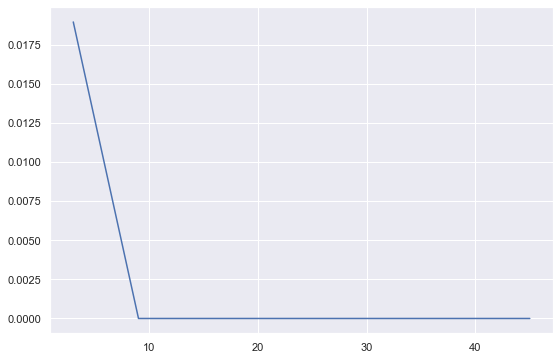

In [17]:
#plt.plot(num_experts, [data[ne]["prob_maj_correct"] for ne in num_experts], label="Prob M Correct")
plt.plot(num_experts, [data[ne]["prob_consensus_correct"] for ne in num_experts], label="Prob D Correct")